# 워드클라우드 분석

In [1]:
# 한글 형태소 분석기
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
from konlpy.tag import Okt, Kkma, Komoran # 세가지 방법이 있음

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 한글 경로
font_path = r"C:\Windows\Fonts\malgun.ttf"# 워드클라우드 분석

In [2]:
# 인스턴스 생성
okt = Okt()
kkma = Kkma()
komoran = Komoran()

# 전체

In [64]:
reviews = pd.read_excel("[크롤링] 역대_네이버_영화_리뷰_최종_수정.xlsx")
reviews.head()

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,1,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄


In [65]:
tokens = []
for i in range(len(reviews["리뷰"])):
    try:
        text = reviews["리뷰"].iloc[i]
        tokens.extend(okt.nouns(text))
    except:
        print(reviews.iloc[i])
len(tokens)

순위                       8
영화명                    아바타
개봉일    2009-12-17 00:00:00
제목                     아바타
개봉     2009-12-17 00:00:00
구분                     관람객
별점                     8.0
리뷰                     NaN
Name: 289, dtype: object
순위                       8
영화명                    아바타
개봉일    2009-12-17 00:00:00
제목                     아바타
개봉     2009-12-17 00:00:00
구분                     관람객
별점                     9.0
리뷰                     NaN
Name: 291, dtype: object
순위                      73
영화명             다크 나이트 라이즈
개봉일    2012-07-19 00:00:00
제목              다크 나이트 라이즈
개봉     2012-07-19 00:00:00
구분                     관람객
별점                     8.0
리뷰                     NaN
Name: 2788, dtype: object
순위                     163
영화명                 7급 공무원
개봉일    2009-04-22 00:00:00
제목                  7급 공무원
개봉     2009-04-22 00:00:00
구분                     관람객
별점                     9.0
리뷰                     NaN
Name: 6209, dtype: object
순위                     164
영화명    

78933

In [66]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

78933

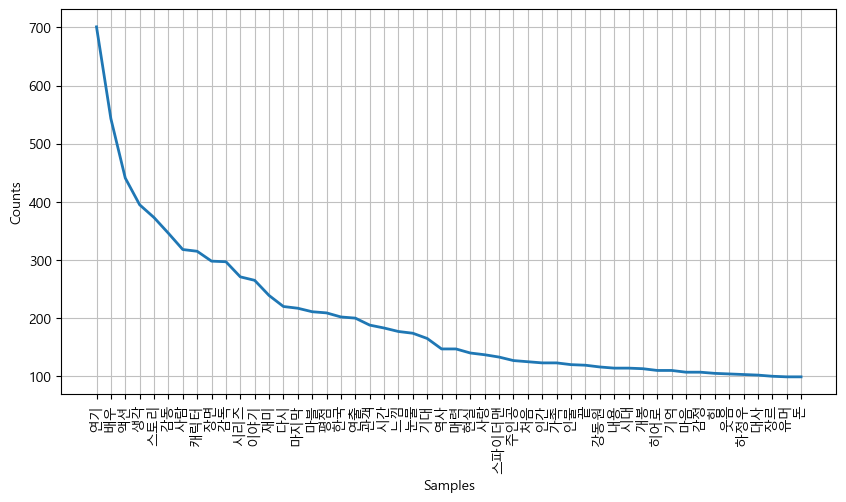

In [67]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [68]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

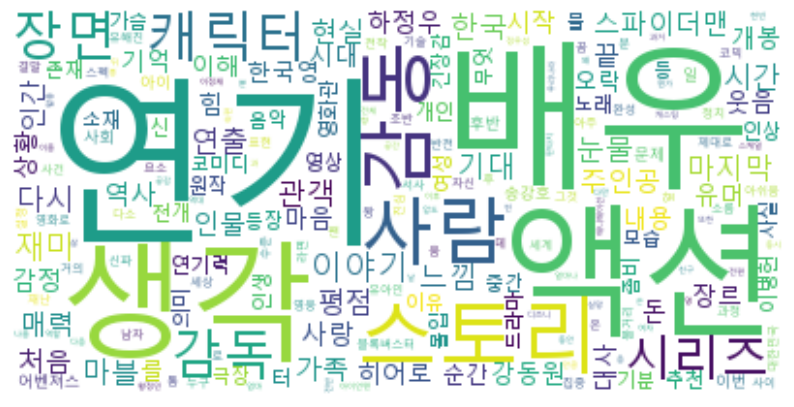

In [69]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 관람객 리뷰 워드클라우드

In [71]:
reviews = pd.read_excel("[크롤링] 역대_네이버_영화_리뷰_최종_수정.xlsx")
netizen = reviews[reviews["구분"]=='관람객']
netizen.head()

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,1,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄


In [72]:
tokens = []
for i in range(len(netizen["리뷰"])):
    try:
        text = netizen["리뷰"].iloc[i]
        tokens.extend(okt.nouns(text))
    except:
        print(netizen.iloc[i])
len(tokens)

순위                       8
영화명                    아바타
개봉일    2009-12-17 00:00:00
제목                     아바타
개봉     2009-12-17 00:00:00
구분                     관람객
별점                     8.0
리뷰                     NaN
Name: 289, dtype: object
순위                       8
영화명                    아바타
개봉일    2009-12-17 00:00:00
제목                     아바타
개봉     2009-12-17 00:00:00
구분                     관람객
별점                     9.0
리뷰                     NaN
Name: 291, dtype: object
순위                      73
영화명             다크 나이트 라이즈
개봉일    2012-07-19 00:00:00
제목              다크 나이트 라이즈
개봉     2012-07-19 00:00:00
구분                     관람객
별점                     8.0
리뷰                     NaN
Name: 2788, dtype: object
순위                     163
영화명                 7급 공무원
개봉일    2009-04-22 00:00:00
제목                  7급 공무원
개봉     2009-04-22 00:00:00
구분                     관람객
별점                     9.0
리뷰                     NaN
Name: 6209, dtype: object
순위                     164
영화명    

46576

In [73]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

46576

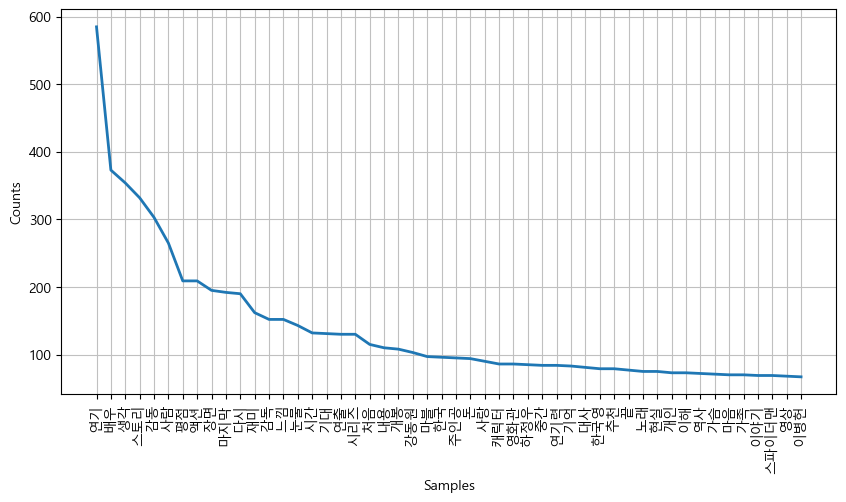

In [74]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [75]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

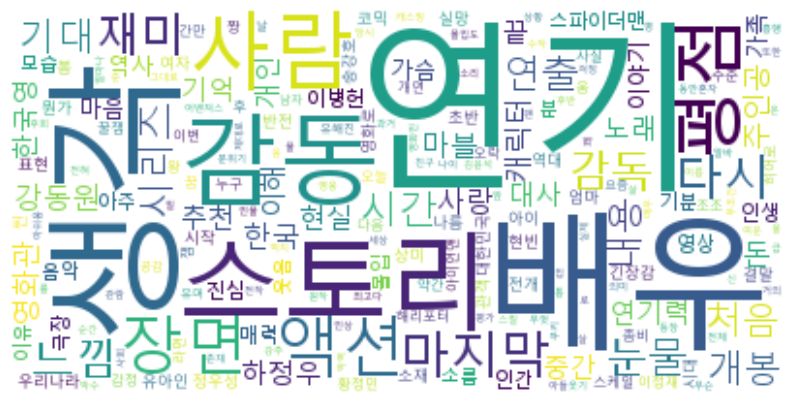

In [76]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 관람객 평점 낮은 리뷰 (1~5)

In [44]:
netizen

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,1,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...,...
7580,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,관람객,9.0,헛 웃음 밖에 안나옴 ..
7581,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,관람객,10.0,이 영화가 실화를 바탕으로 구성이 되었다는게 참...안성기님과 박원상님의 연기가 영...
7582,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,관람객,10.0,안성기가 국민배우라는 게 실감된다. 무려 OOO 전에 양승태를 고발한 영화임. 양...
7583,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,관람객,10.0,ㅅㅂ 족같은 세상. 법이 왜있냐?? 응??판사가 법 어기고도 그냥 기각합니다. 이ㅈ...


In [77]:
tokens = []
count = 0

for i in range(len(netizen["리뷰"])):
    try:
        if int(netizen['별점'].iloc[i]) <= 5:
            text = netizen["리뷰"].iloc[i]
            tokens.extend(okt.nouns(text))
            count += 1 
        else:
            pass
    except:
        print(netizen.iloc[i])
len(tokens)

6342

In [78]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

6342

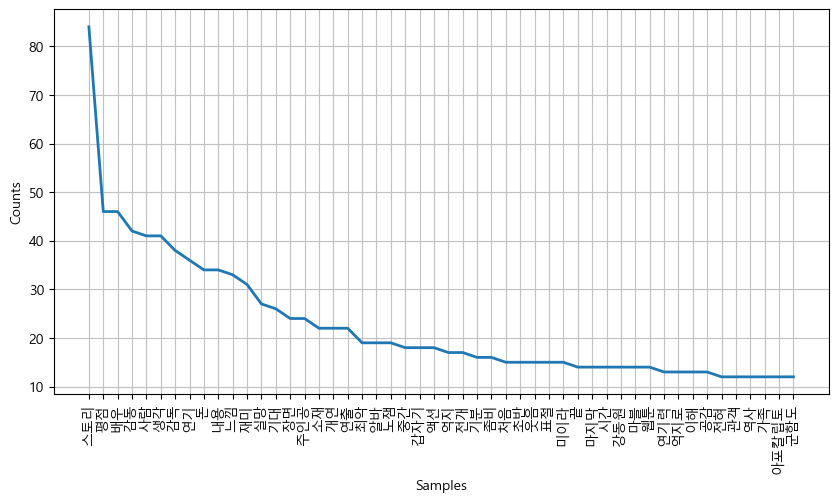

In [79]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [80]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

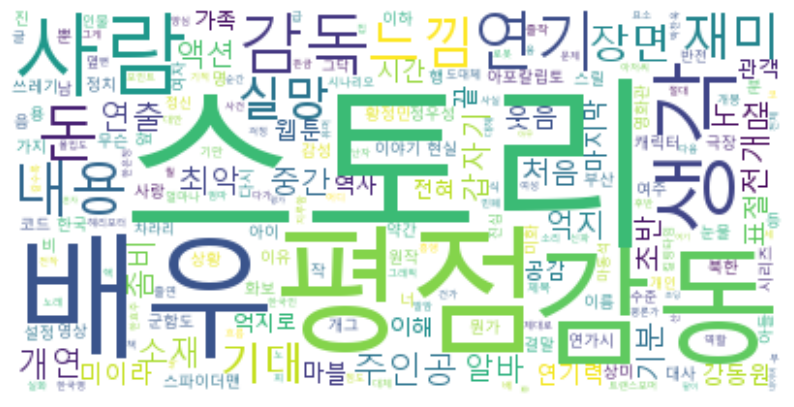

In [81]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [82]:
# 역대에서 평점 낮은것을 분석하는것보다는 최신 키워드를 아는게 중요할 것 같음